# 9. What is the average hospital rating?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Hospital General Information.csv", encoding= 'latin')

In [11]:
df['Hospital overall rating'] = pd.to_numeric(df['Hospital overall rating'], errors= 'coerce')

In [12]:
valid_rating = df['Hospital overall rating'].dropna()

In [9]:
average_rating= valid_rating.mean()
print(f"Average Hospital Overall Rating: {average_rating:.2f}")

Average Hospital Overall Rating: 3.06


#10.What is the distribution of hospital ratings? (Histogram/Boxplot)

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df['Hospital overall rating'] = pd.to_numeric(df['Hospital overall rating'], errors= 'coerce')

In [22]:
valid_ratings = df['Hospital overall rating'].dropna()

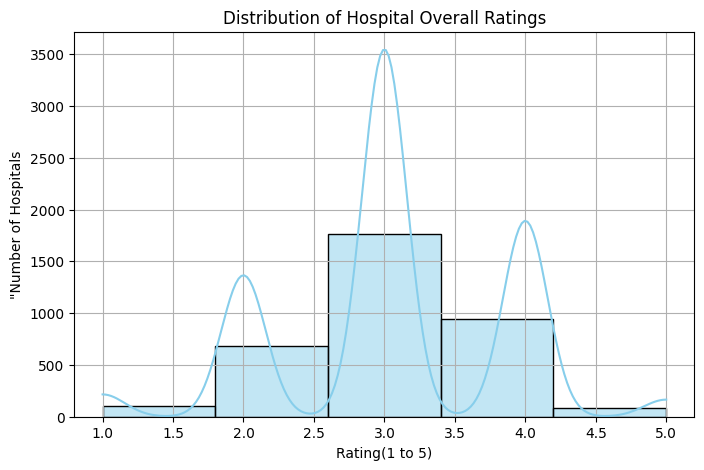

In [24]:
plt.figure(figsize= (8,5))
sns.histplot(valid_ratings, bins=5, kde=True, color='skyblue')
plt.title('Distribution of Hospital Overall Ratings')
plt.xlabel('Rating(1 to 5)')
plt.ylabel('"Number of Hospitals')
plt.grid(True)
plt.show()

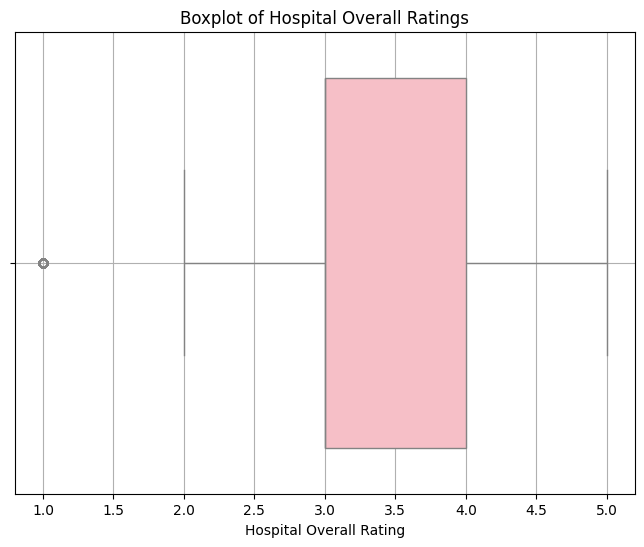

In [26]:
plt.figure(figsize= (8,6))
sns.boxplot(x=valid_ratings, color= 'lightpink')
plt.title('Boxplot of Hospital Overall Ratings')
plt.xlabel('Hospital Overall Rating')
plt.grid(True)
plt.show()

#11.Which states have the highest and lowest average hospital ratings?

In [27]:
df['Hospital overall rating']= pd.to_numeric(df['Hospital overall rating'], errors= 'coerce')
df= df.dropna(subset= ['Hospital overall rating', 'State'])

In [29]:
state_avg_ratings = df.groupby('State')['Hospital overall rating'].mean().sort_values(ascending=False)

In [30]:
top_states = state_avg_ratings.head(5)
print(" Top 5 States by Average Hospital Rating:")
print(top_states)

 Top 5 States by Average Hospital Rating:
State
SD    3.857143
DE    3.666667
WI    3.611111
MN    3.531646
ID    3.526316
Name: Hospital overall rating, dtype: float64


In [32]:
bottom_states = state_avg_ratings.tail(5)
print("Bottom 5 States by Average Hospital Rating:")
print(bottom_states)

Bottom 5 States by Average Hospital Rating:
State
NV    2.400000
NY    2.320261
PR    2.111111
VI    2.000000
DC    1.428571
Name: Hospital overall rating, dtype: float64


#12.What is the most common mortality rating given to hospitals?

In [33]:
print("Unique Mortality Ratings:")
print(df['Mortality national comparison'].unique())

Unique Mortality Ratings:
['Same as the national average' 'Below the national average'
 'Not Available' 'Above the national average']


In [34]:
mortality_data = df['Mortality national comparison'].dropna()

In [37]:
mortality_counts = mortality_data.value_counts()
print("Most Common Mortality Ratings:")
print(mortality_counts)

Most Common Mortality Ratings:
Mortality national comparison
Same as the national average    2592
Above the national average       400
Below the national average       341
Not Available                    234
Name: count, dtype: int64


In [39]:
most_common = mortality_counts.idxmax()
print(f"Most Common Mortality Ratings: {most_common}")

Most Common Mortality Ratings: Same as the national average


<ipython-input-40-82b50d1b22cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= mortality_counts.values, y= mortality_counts.index, palette ='Set2')


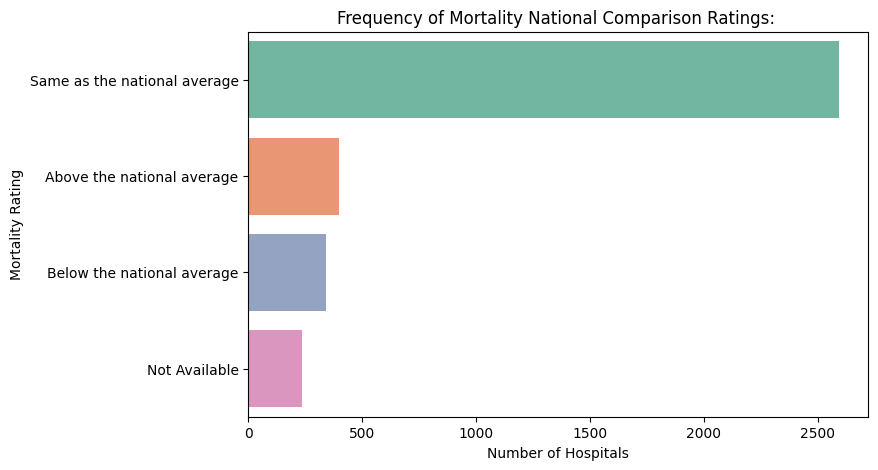

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x= mortality_counts.values, y= mortality_counts.index, palette ='Set2')
plt.title("Frequency of Mortality National Comparison Ratings: ")
plt.xlabel("Number of Hospitals")
plt.ylabel("Mortality Rating")
plt.show()



#13.How does the safety of care compare across different hospital ownership types?

In [47]:
valid_ratings = ['Above the national average', 'Same as the national average', 'Below the national average']
filtered_df = df[df['Safety of care national comparison'].isin(valid_ratings)]

In [51]:
ownership_safety_counts = pd.crosstab(
    filtered_df['Hospital Ownership'],
    filtered_df['Safety of care national comparison']
)

print(" Count of Safety Ratings by Ownership Type:")
print(ownership_safety_counts)

 Count of Safety Ratings by Ownership Type:
Safety of care national comparison           Above the national average  \
Hospital Ownership                                                        
Government - Federal                                                  0   
Government - Hospital District or Authority                          48   
Government - Local                                                   25   
Government - State                                                   13   
Physician                                                             5   
Proprietary                                                         180   
Voluntary non-profit - Church                                        77   
Voluntary non-profit - Other                                         80   
Voluntary non-profit - Private                                      354   

Safety of care national comparison           Below the national average  \
Hospital Ownership                                     

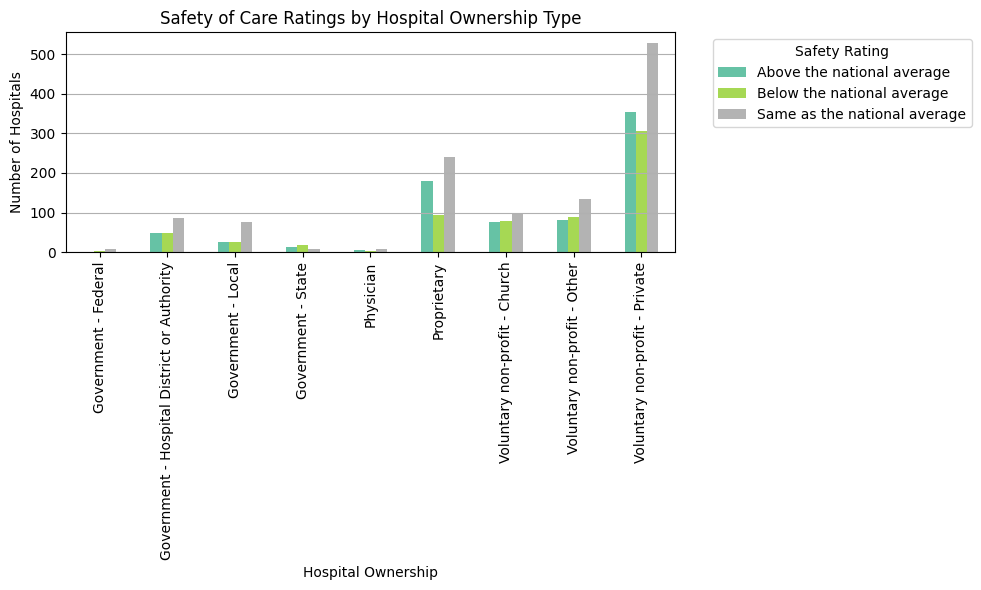

In [52]:
ownership_safety_counts.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title("Safety of Care Ratings by Hospital Ownership Type")
plt.xlabel("Hospital Ownership")
plt.ylabel("Number of Hospitals")
plt.legend(title="Safety Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#14.What is the relationship between patient experience and overall hospital rating?

In [54]:
valid_experience = [
    'Above the national average',
    'Same as the national average',
    'Below the national average'
]

filtered_df= df[
    df['Patient experience national comparison'].isin(valid_experience) &
    df['Hospital overall rating'].notna()
]

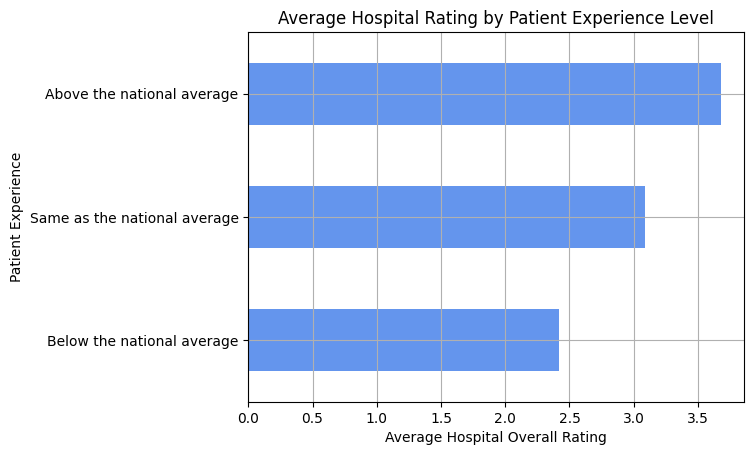

In [55]:
avg_rating_by_experience = filtered_df.groupby('Patient experience national comparison')['Hospital overall rating'].mean().sort_values()

avg_rating_by_experience.plot(kind='barh', color='cornflowerblue')
plt.title("Average Hospital Rating by Patient Experience Level")
plt.xlabel("Average Hospital Overall Rating")
plt.ylabel("Patient Experience")
plt.grid(True)
plt.show()

#15.What is the average readmission rate by state?

In [56]:
readmission_map= {
    'Aboveo the national average':3,
    'Same as the national average': 2,
    'Below the national average':1
}

df['Readmission Score'] = df['Readmission national comparison'].map(readmission_map)

valid_df = df.dropna(subset=['State', 'Readmission Score'])

state_readmission_avg = valid_df.groupby('State')['Readmission Score'].mean().sort_values()

print("📊 Average Readmission Score by State (Lower is Better):")
print(state_readmission_avg.round(2))

📊 Average Readmission Score by State (Lower is Better):
State
DC    1.00
NJ    1.25
DE    1.33
VT    1.33
NY    1.36
RI    1.38
FL    1.41
MA    1.44
VA    1.53
MI    1.56
AR    1.57
KY    1.59
IL    1.60
PA    1.60
NV    1.61
CT    1.62
WV    1.62
MS    1.63
CA    1.64
SC    1.66
PR    1.67
TN    1.67
MO    1.68
NC    1.70
GA    1.74
AZ    1.76
LA    1.77
OH    1.78
TX    1.80
AL    1.81
NH    1.82
IN    1.83
NM    1.86
KS    1.86
OK    1.88
WA    1.88
ME    1.91
WY    1.92
IA    1.92
MN    1.94
OR    1.94
NE    1.94
CO    1.96
WI    1.97
AK    2.00
GU    2.00
HI    2.00
ID    2.00
ND    2.00
MT    2.00
SD    2.00
UT    2.00
VI    2.00
Name: Readmission Score, dtype: float64


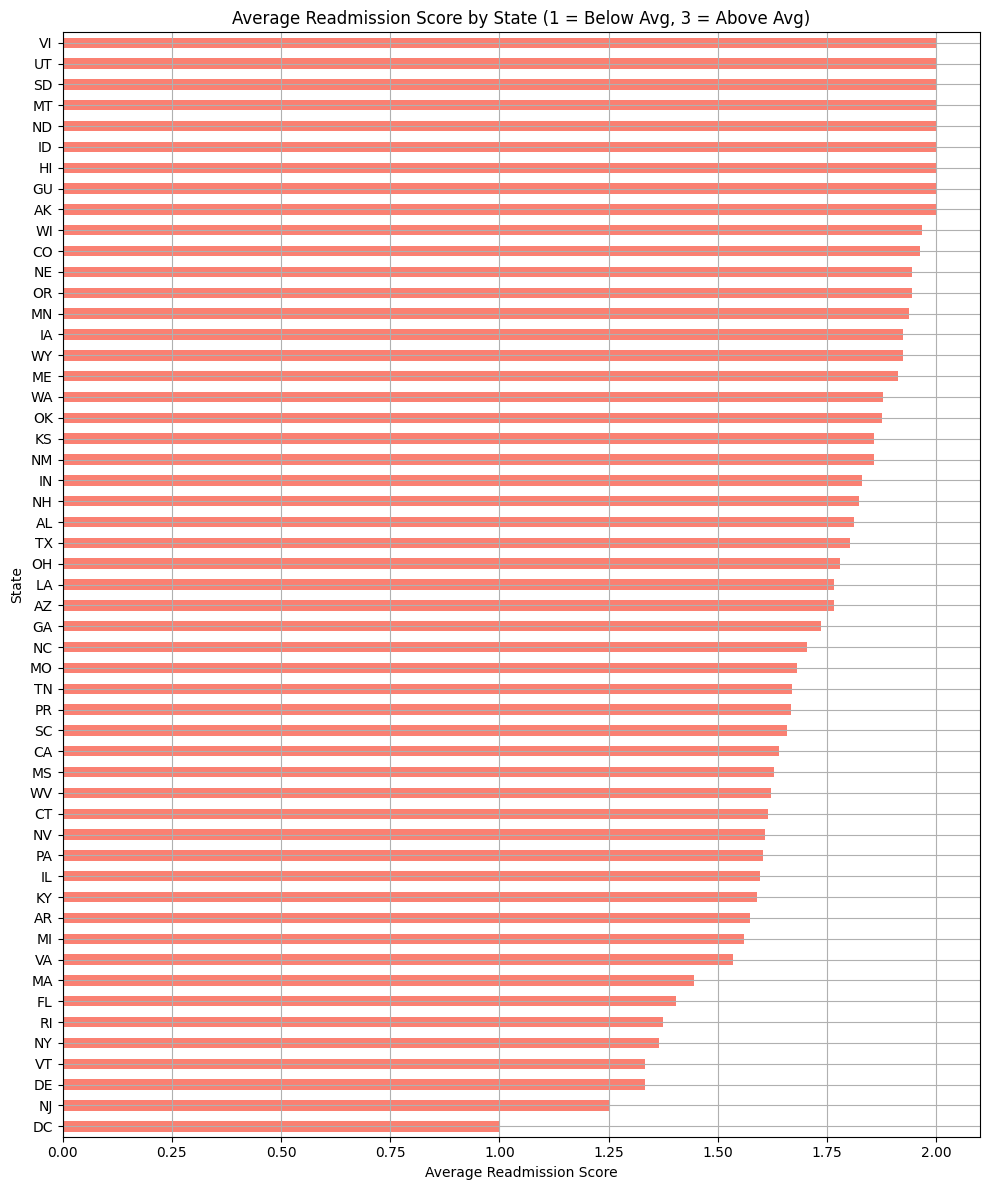

In [57]:
state_readmission_avg.plot(kind='barh', figsize=(10, 12), color='salmon')
plt.title("Average Readmission Score by State (1 = Below Avg, 3 = Above Avg)")
plt.xlabel("Average Readmission Score")
plt.ylabel("State")
plt.grid(True)
plt.tight_layout()
plt.show()